In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from keras import datasets, Sequential
from keras.layers import Conv2D, Dense, MaxPooling2D, Flatten, Dropout
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from keras.callbacks import ModelCheckpoint
import numpy as np
from keras.utils import np_utils    
import matplotlib.pyplot as plt
from tensorflow.keras.optimizers import Adam
from keras.preprocessing import  image
from keras.models import load_model
from keras.preprocessing.image import load_img, img_to_array,array_to_img,ImageDataGenerator
import numpy as np
import os
import cv2 as cv

In [ ]:
dir_folder = '/content/drive/MyDrive/Colab_Notebooks/DienVienNoiTieng/DienVienNoiTieng'
x_train = []
y_train = []
labels = []
count = 0

# tạo lí tạo dữ liệu training
for i in os.listdir(dir_folder):

  path = os.path.join(dir_folder, i)
  labels.append(str(i))

  for j in os.listdir(path):

    path_img = os.path.join(path,j)
    
    img = load_img(path_img, target_size=(70,70)) 
    img = img_to_array(img)
    img = img.reshape(70,70,3) 
    img = img.astype('float32')
    img = img/255

    x_train.append(img)
    y_train.append(count)

  count += 1

  

In [ ]:
x_train = np.asarray(x_train)
y_train = np.asarray(y_train)
y_train = np_utils.to_categorical(y_train)

print(x_train.shape, y_train.shape)

(3000, 70, 70, 3) (3000, 5)


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x_train, y_train, test_size=0.3, random_state=70)
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(2100, 70, 70, 3) (2100, 5)
(900, 70, 70, 3) (900, 5)


In [ ]:
model = Sequential()

model.add(Conv2D(filters=32,
                 kernel_size=(2,2),
                 activation='relu',
                 kernel_initializer='he_uniform',
                 padding='same',
                 input_shape=(70,70,3),
                 strides=(1,1)))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.2))

model.add(Conv2D(filters=64,
                 kernel_size=(2,2),
                 activation='relu',
                 padding='same',
                 strides=(1,1)))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.2))

model.add(Conv2D(filters=128,
                 kernel_size=(2,2),
                 padding='same',
                 activation='relu',
                 strides=(2,2)))

model.add(Flatten())

model.add(Dense(512, activation='relu',input_shape=(70*70*3,), name='layer1')) 
model.add(Dropout(0.2))
model.add(Dense(1028, activation='relu', name='layer2'))
model.add(Dropout(0.2))
model.add(Dense(2056, activation='relu', name='layer3'))
model.add(Dropout(0.2))
model.add(Dense(1028, activation='relu', name='layer6'))
model.add(Dropout(0.2))
model.add(Dense(5, activation='softmax', name='layer7'))

model.summary()

model.compile(loss = 'categorical_crossentropy', optimizer = Adam(lr=0.000001),metrics = ['accuracy'])               

checkpoint = ModelCheckpoint('best_model_improved.h5',     # model filename
                             monitor='val_accuracy',           # quantity to monitor
                             verbose=1,                    # verbosity - 0 or 1
                             save_best_only= True,        # The latest best model will not be overwritten
                             mode='auto')

history = model.fit(x_train, y_train, 
                    epochs=200,
                    validation_data=(x_test, y_test),  
                    callbacks=[checkpoint] ,                
                    verbose=1)
model.save('Model_hieu1.h5')

In [ ]:
model.save('/content/drive/MyDrive/Colab_Notebooks/model.save/Model_hieu1.h5')

In [ ]:
model= load_model('/content/drive/MyDrive/Colab_Notebooks/model.save/Model_hieu1.h5')

In [ ]:
classes = ['bill_gates', 'elon_musk', 'mark_zuckerberg', 'steve_jobs', 'jeff_bezos']

Tỉ lệ so sánh: [[0.63391054 0.21400124 0.07490882 0.02964724 0.0475321 ]]
Giống với: bill_gates nhất, độ chính xác là: 63.391053676605225 %


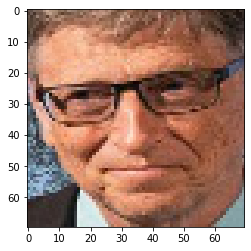

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
img = load_img('bill_gates_test2.jpg', target_size=(70,70))
plt.imshow(img)
imgRe = img_to_array(img)
imgRe = imgRe.reshape(1,70,70,3)  
imgRe = imgRe.astype('float32')
imgRe /= 255
y_pred = model.predict(imgRe)
a = y_pred.max()
a = a*100

print("Tỉ lệ so sánh:",y_pred)
y_classes = [np.argmax(element) for element in y_pred]
y_classes
print("Giống với:",classes[y_classes[0]], "nhất, độ chính xác là:",a,"%")


